In [1]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv('../datastore/training/FPL_data_23_24.csv')
print(dataset.head(10))
print(dataset.shape) #407, 13

           name  price     team  goals  assists  goal_contributions  \
0  Fábio Vieira    5.5  Arsenal      1        3                   4   
1       G.Jesus    7.0  Arsenal      4        7                  11   
2       Gabriel    6.0  Arsenal      3        1                   4   
3       Havertz    8.0  Arsenal     13       10                  23   
4      J.Timber    5.5  Arsenal      0        0                   0   
5      Jorginho    5.0  Arsenal      0        2                   2   
6        Kiwior    5.0  Arsenal      1        3                   4   
7    Martinelli    7.0  Arsenal      6        5                  11   
8        Nelson    5.0  Arsenal      0        0                   0   
9       Nketiah    6.0  Arsenal      5        4                   9   

   games_played  minutes  total_points  points_per_game     roi position  \
0             2      290            24              2.2   4.364      MID   
1            17     1470            85              3.1  12.140   

In [2]:
data = dataset.sample(frac=0.85, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (346, 13)
Unseen Data For Predictions: (61, 13)


In [3]:
from pycaret.regression import *
s = setup(data = data, target = 'roi', session_id=7177, ignore_features=['name'])
print(s)

,Description,Value
0,Session id,7177
1,Target,roi
2,Target type,Regression
3,Original data shape,"(346, 13)"
4,Transformed data shape,"(346, 34)"
5,Transformed train set shape,"(242, 34)"
6,Transformed test set shape,"(104, 34)"
7,Ignore features,1
8,Numeric features,9
9,Categorical features,2


In [4]:
best = compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:55:47
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6935,0.9554,0.9578,0.9811,0.1322,0.1405,0.1200
gbr,Gradient Boosting Regressor,0.6834,1.0501,1.0036,0.9789,0.0726,0.0695,0.0090
ridge,Ridge Regression,0.8177,1.2195,1.0896,0.9754,0.1856,0.2256,0.0060
lr,Linear Regression,0.8202,1.2320,1.0945,0.9752,0.1865,0.2252,0.4280
br,Bayesian Ridge,0.8257,1.2292,1.0939,0.9752,0.1847,0.2248,0.0050
rf,Random Forest Regressor,0.8423,1.5035,1.2085,0.9692,0.0853,0.0831,0.0230
et,Extra Trees Regressor,0.8415,1.6140,1.2372,0.9676,0.0837,0.0803,0.0180
ada,AdaBoost Regressor,1.0606,2.0251,1.4049,0.9589,0.1702,0.2080,0.0100
dt,Decision Tree Regressor,1.1085,2.5970,1.5925,0.9452,0.1078,0.1023,0.0050
en,Elastic Net,1.2391,2.8068,1.5930,0.9447,0.1851,0.2260,0.0050


In [5]:
lightgbm = create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:55:57
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7183,0.7831,0.8849,0.9854,0.0899,0.0862
1,0.8695,1.4704,1.2126,0.9787,0.2404,0.3160
2,0.6380,0.7559,0.8694,0.9802,0.1710,0.1523
3,0.7866,1.2010,1.0959,0.9727,0.0642,0.0524
4,0.4282,0.3249,0.5700,0.9907,0.0938,0.0867
5,0.7005,0.9328,0.9658,0.9834,0.1214,0.0963
6,0.5688,0.6011,0.7753,0.9828,0.0809,0.0846
7,0.8532,1.2977,1.1392,0.9758,0.1417,0.2544
8,0.6605,0.7510,0.8666,0.9880,0.1346,0.1774


In [6]:
tuned_lightgbm = tune_model(lightgbm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:55:59
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:55:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:55:59
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8667,1.0898,1.0439,0.9797,0.1183,0.0933
1,1.0594,2.2788,1.5096,0.9670,0.2464,0.3220
2,0.9391,1.5031,1.2260,0.9606,0.1876,0.1975
3,1.3139,2.6233,1.6196,0.9403,0.1011,0.0956
4,0.7983,1.0589,1.0290,0.9697,0.1357,0.1484
5,0.8256,1.3918,1.1798,0.9753,0.1325,0.1243
6,0.8596,1.3854,1.1770,0.9603,0.1048,0.1089
7,0.9632,1.7800,1.3342,0.9668,0.1528,0.2737
8,0.9059,1.3183,1.1482,0.9789,0.1598,0.2260


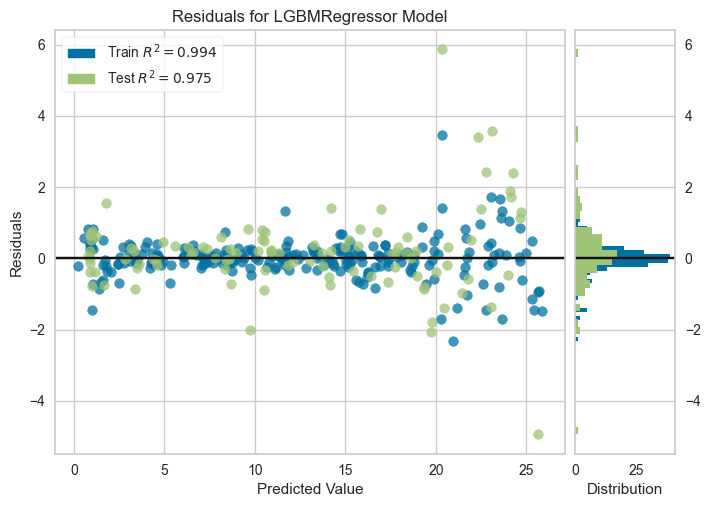

In [7]:
plot_model(tuned_lightgbm)

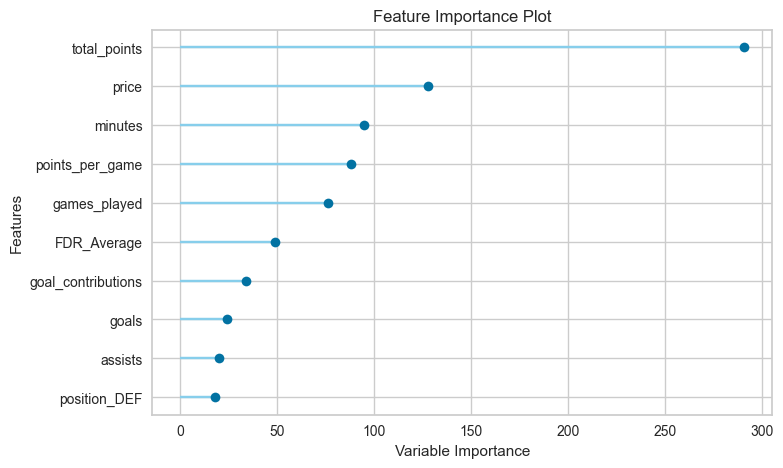

In [8]:
plot_model(tuned_lightgbm, plot='feature')

In [9]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [10]:
print(final_lightgbm)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['price', 'goals', 'assists',
                                             'goal_contributions',
                                             'games_played', 'minutes',
                                             'total_points', 'points_per_game',
                                             'FDR_Average'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['team', 'position'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['team', 'position'],
                                    transformer=OneHotEncoder(cols=['team',
                                                                    'position'],
                                              

In [11]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head(100)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4917,0.8061,0.8978,0.9864,0.0620,0.0838


,name,price,team,goals,assists,goal_contributions,games_played,minutes,total_points,points_per_game,position,FDR_Average,roi,prediction_label
0,Havertz,8.0,Arsenal,13,10,23,30,2627,180,4.9,FWD,12.666667,22.500000,20.444506
1,Jorginho,5.0,Arsenal,0,2,2,10,913,44,1.8,MID,12.666667,8.800000,8.168033
2,Thomas,5.0,Arsenal,0,0,0,9,785,24,1.7,MID,12.666667,4.800000,4.680437
3,White,6.5,Arsenal,4,5,9,35,2987,182,4.9,DEF,12.666667,28.000000,24.300157
4,Archer,5.0,Aston Villa,4,3,7,21,1829,82,2.7,FWD,5.298245,16.400000,16.513826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,N.Aguerd,4.5,West Ham,1,0,1,21,1857,36,1.7,DEF,-0.315789,8.000000,8.206960
57,Bellegarde,5.0,Wolves,2,2,4,10,948,45,2.0,MID,-2.421053,9.000000,8.903684
58,Fábio Silva,5.0,Wolves,0,0,0,3,259,8,1.0,FWD,-2.421053,1.600000,1.816956
59,Hee Chan,6.5,Wolves,12,3,15,25,2116,125,4.3,MID,-2.421053,19.230000,20.711774


In [12]:
save_model(final_lightgbm,'Final Lightgbm Model ROI-Target')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['price', 'goals', 'assists',
                                              'goal_contributions',
                                              'games_played', 'minutes',
                                              'total_points', 'points_per_game',
                                              'FDR_Average'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['team', 'position'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['team', 'position'],
                                     transformer=OneHotEncoder(cols=['team',
                                                                     'position'],
                               

In [13]:
saved_final_lightgbm = load_model('Final Lightgbm Model ROI-Target')

data_new = pd.read_csv('../datastore/current/FPL_data_19.csv')
new_prediction = predict_model(saved_final_lightgbm, data=data_new)
new_prediction.sort_values('prediction_label', ascending=False)

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3833,0.4116,0.6416,0.9775,0.2225,0.1518


,name,price,games_played,goals,assists,goal_contributions,total_points,points_per_game,position,team,minutes,FDR_Average,roi,prediction_label
407,M.Salah,13.6,17,16,11,27,186,10.9,MID,Liverpool,1493,2.702,13.6800,18.873723
215,Palmer,11.4,18,12,7,19,141,7.8,MID,Chelsea,1568,1.658,12.3700,18.432693
524,Aina,5.1,18,2,0,2,81,4.5,DEF,Nott'm Forest,1553,1.535,15.8800,16.186070
281,Pickford,5.0,17,0,0,0,82,4.8,GK,Everton,1530,-0.930,16.4000,15.856721
674,Cunha,7.1,17,10,4,14,110,6.1,FWD,Wolves,1515,-1.579,15.4900,15.350583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Lukaku,6.3,0,0,0,0,0,0.0,FWD,Chelsea,0,1.658,0.0000,-0.046372
418,Chiesa,6.8,0,0,0,0,1,1.0,MID,Liverpool,18,2.702,0.1471,-0.233904
520,Wilson,6.9,0,0,0,0,3,0.8,FWD,Newcastle,57,0.746,0.4348,-0.274743
435,J.Alvarez,7.0,0,0,0,0,0,0.0,FWD,Man City,0,0.509,0.0000,-0.274743
